In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
df = pd.read_csv('/content/weather_clean.csv', index_col=0)


<ipython-input-3-e0b351fac8e3>:8: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/weather_clean.csv', index_col=0)


In [4]:
print("=== Информация о датасете ===")
print(df.info())

=== Информация о датасете ===
<class 'pandas.core.frame.DataFrame'>
Index: 48148 entries, 0 to 48147
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tmax         48148 non-null  int64  
 1   tmin         48148 non-null  int64  
 2   tavg         48147 non-null  float64
 3   depart       48147 non-null  float64
 4   dewpoint     48147 non-null  float64
 5   wetbulb      48147 non-null  float64
 6   heat         48147 non-null  float64
 7   cool         48147 non-null  float64
 8   sunrise      48147 non-null  float64
 9   sunset       48147 non-null  float64
 10  snowfall     48147 non-null  float64
 11  preciptotal  48147 non-null  float64
 12  stnpressure  48147 non-null  float64
 13  sealevel     48147 non-null  float64
 14  resultspeed  48147 non-null  float64
 15  resultdir    48147 non-null  float64
 16  avgspeed     48147 non-null  float64
 17  city         48147 non-null  object 
 18  +FC          48147 no

In [5]:
# Описательная статистика
print("\n=== Описательная статистика ===")
display(df.describe(include='all'))


=== Описательная статистика ===


,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,...,DR,SH,FZ,MI,PR,BC,BL,VC,units,item_nbr
count,48148.000000,48148.000000,48147.000000,48147.000000,48147.000000,48147.000000,48147.000000,48147.000000,48147.000000,48147.000000,...,48147,48147,48147,48147,48147,48147,48147,48147,48147.000000,48147.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2,1,1,2,1,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48147,48147,46260,48147,48147,47925,48147,48147,NaN,NaN
mean,56.141854,31.969905,44.309490,5.426506,29.794193,38.047791,20.755063,0.064552,728.249050,1725.824662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.440879,55.976447
std,13.903664,11.440637,12.047221,7.954951,13.702972,11.300568,11.928128,0.419119,8.406168,43.803055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.508335,32.034980
min,10.000000,-7.000000,5.000000,-18.000000,-7.000000,2.000000,0.000000,0.000000,704.000000,1621.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,48.000000,26.000000,37.000000,-1.000000,22.000000,31.000000,13.000000,0.000000,724.000000,1727.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,28.000000
50%,58.000000,31.000000,45.000000,6.000000,28.000000,38.000000,20.000000,0.000000,728.000000,1740.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,56.000000
75%,66.000000,39.000000,52.000000,11.000000,40.000000,45.000000,28.000000,0.000000,735.000000,1749.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,84.000000


In [6]:
# Проверка на пропуски
print("\n=== Проверка на пропуски ===")
df.dropna(inplace=True)
print(df.isnull().sum())


=== Проверка на пропуски ===
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
city           0
+FC            0
FC             0
TS             0
GR             0
RA             0
DZ             0
SN             0
SG             0
GS             0
PL             0
IC             0
FG+            0
FG             0
BR             0
UP             0
HZ             0
FU             0
VA             0
DU             0
DS             0
PO             0
SA             0
SS             0
PY             0
SQ             0
DR             0
SH             0
FZ             0
MI             0
PR             0
BC             0
BL             0
VC             0
units          0
item_nbr       0
dtype: int64



=== Корреляционная матрица ===


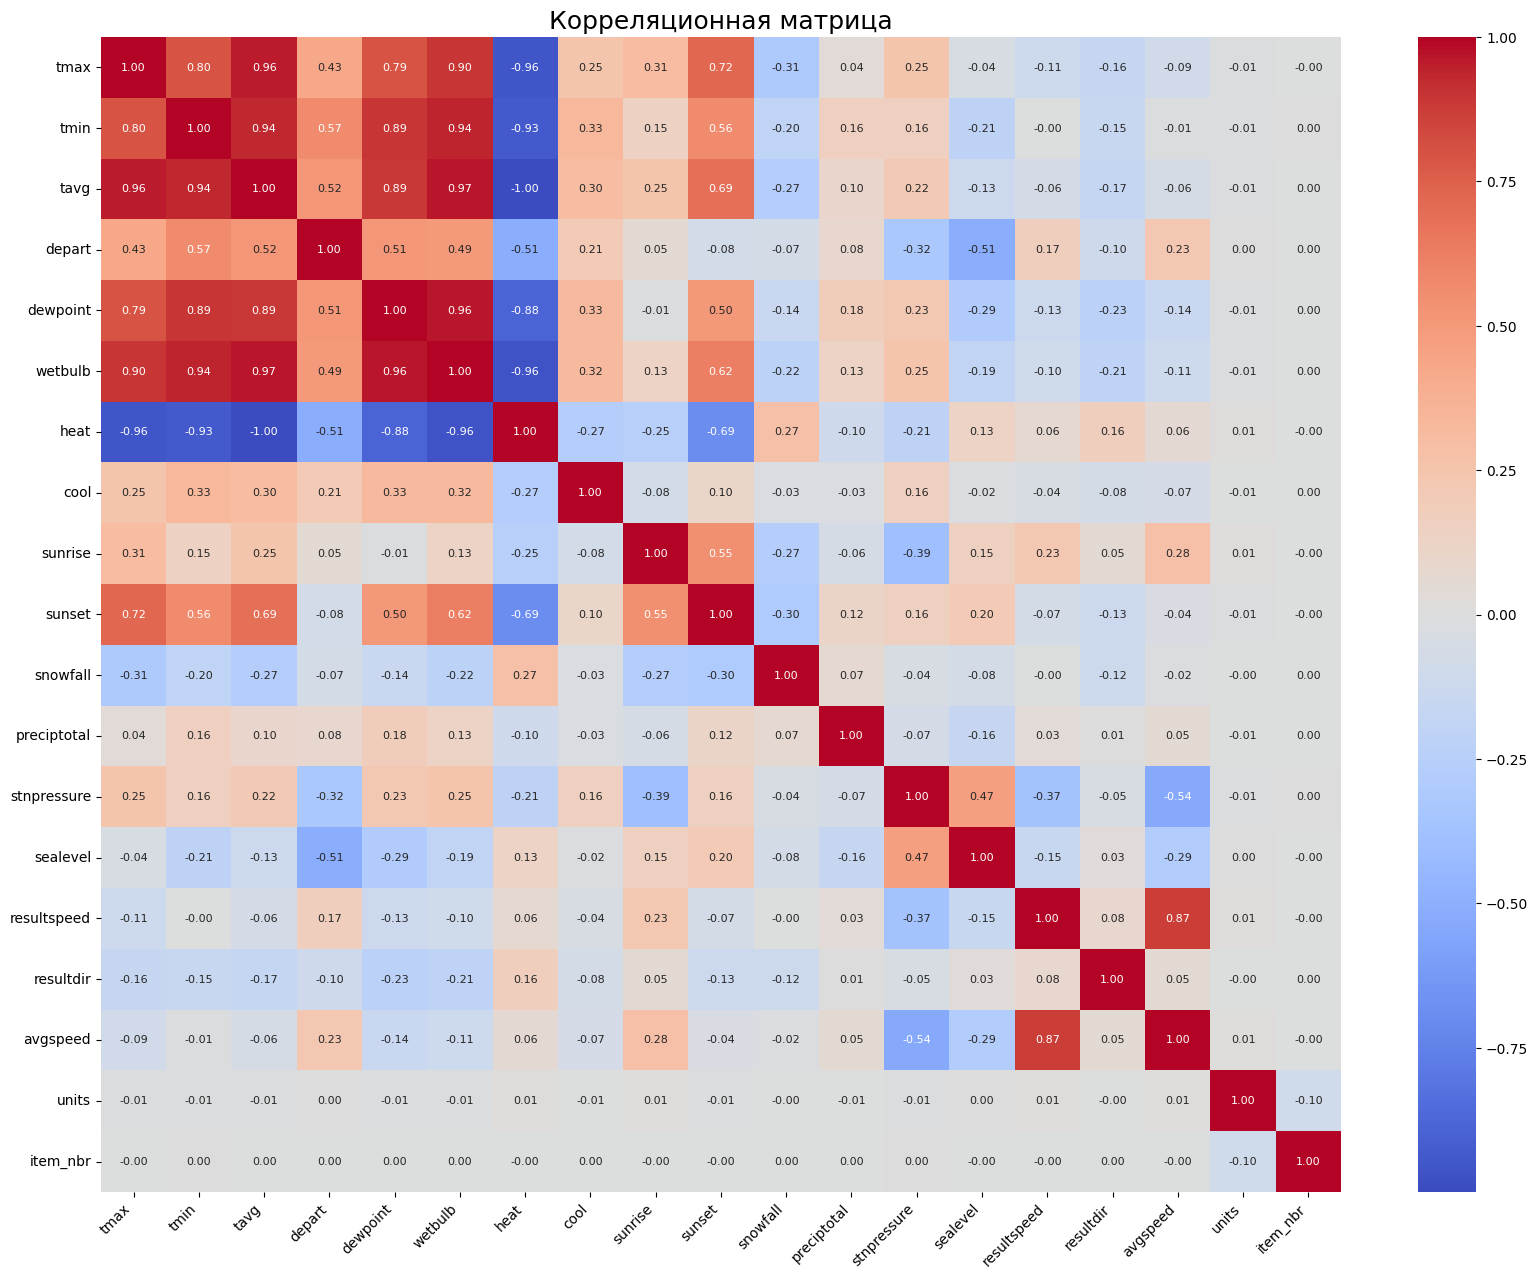

In [7]:
# Корреляционная матрица
print("\n=== Корреляционная матрица ===")


df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 15))
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size":8}
)
plt.title('Корреляционная матрица', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


In [8]:
#Распределения признаков и целевой переменной
def plot_distributions(df, target_col=None):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Распределение: {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.show()

    if target_col:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[target_col], kde=True, bins=30)
        plt.title(f'Распределение целевой переменной: {target_col}')
        plt.xlabel(target_col)
        plt.ylabel('Частота')
        plt.show()

- На графиках распределения видно, что большинство признаков имеют **симметричное или скошенное** распределение.
- Возможны выбросы, но для этого сделаем отдельный анализ.
- Целевая переменная "units" распределена **неравномерно**.


In [9]:
#Анализ выбросов

def analyze_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()

        # Статистика выбросов по правилу 1.5 * IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f'Кол-во выбросов в {col}: {outliers.shape[0]}')

- В данных обнаружены выбросы в некоторых числовых признаках.
- Их количество указано для каждого признака в выводе.
- Выбросы не обработы т.к данных мало.


In [10]:
#Анализ сбалансированности целевой переменной

def analyze_target_balance(df, target_col):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[target_col])
    plt.title(f'Сбалансированность целевой переменной: {target_col}')
    plt.ylabel('Количество')
    plt.show()

    print("\nБаланс классов (%):")
    print(df[target_col].value_counts(normalize=True) * 100)


=== Распределения признаков и целевой переменной ===


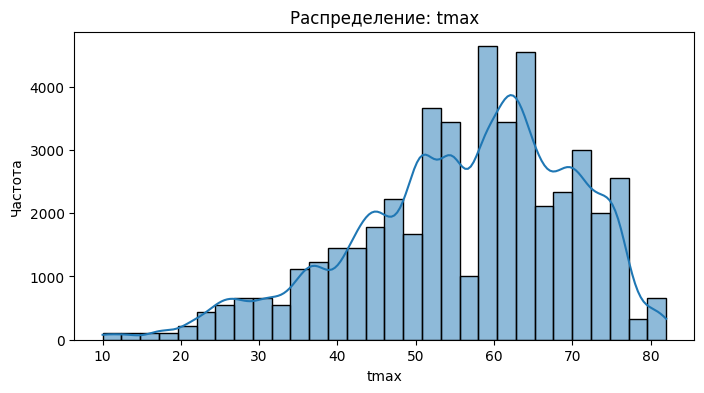

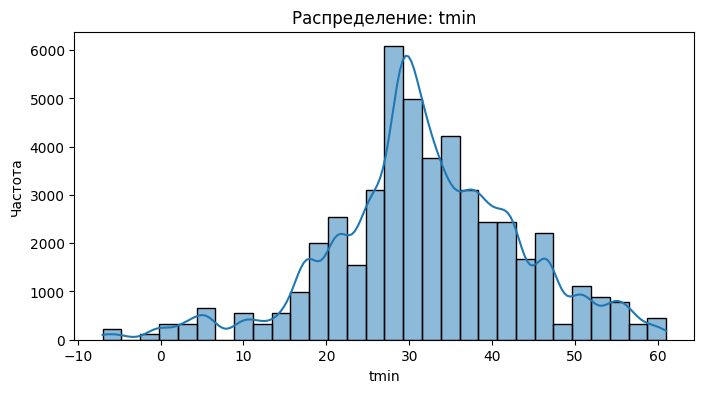

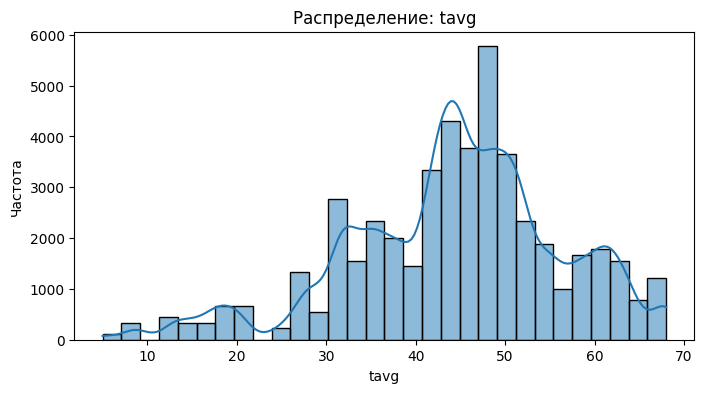

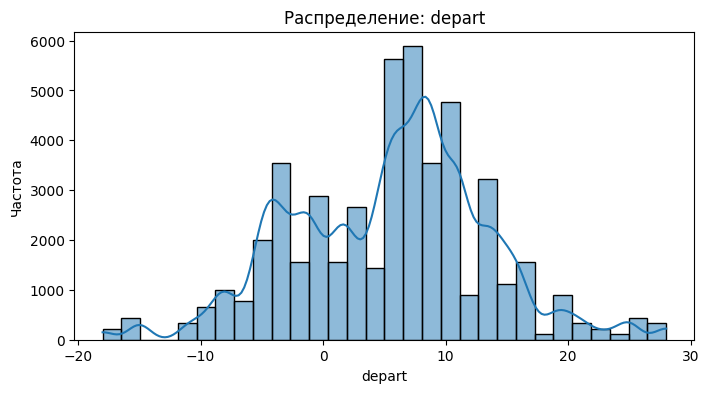

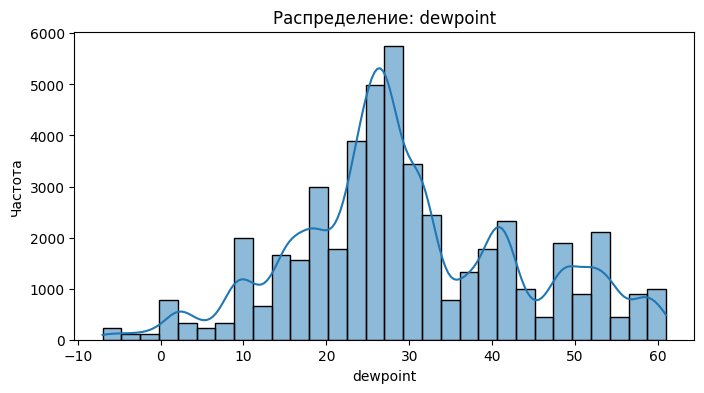

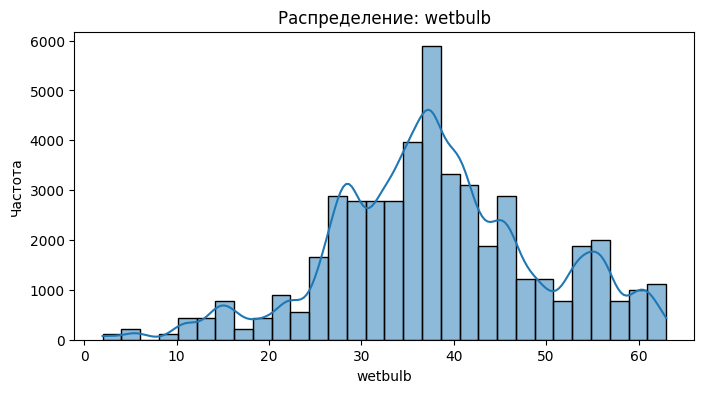

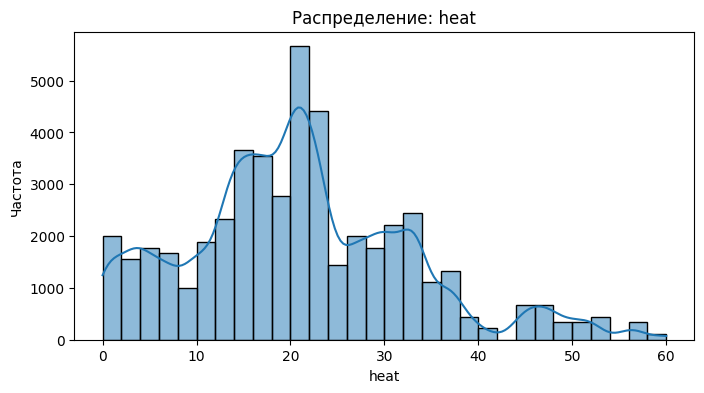

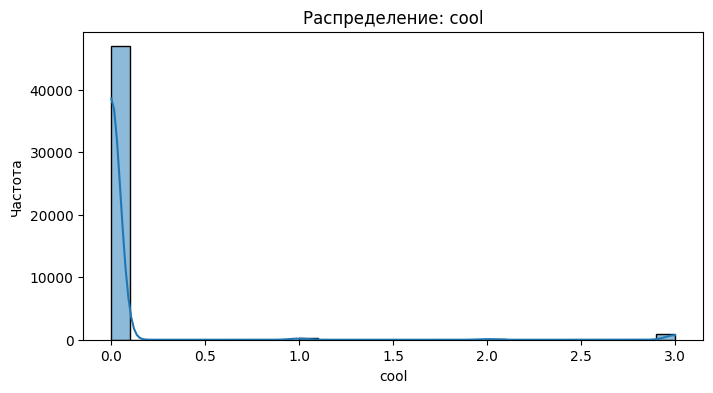

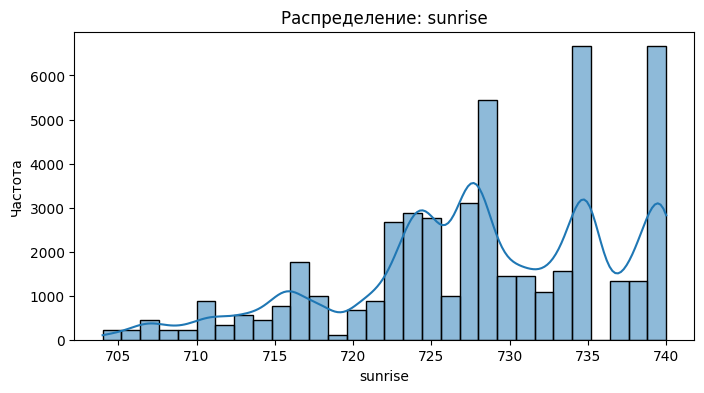

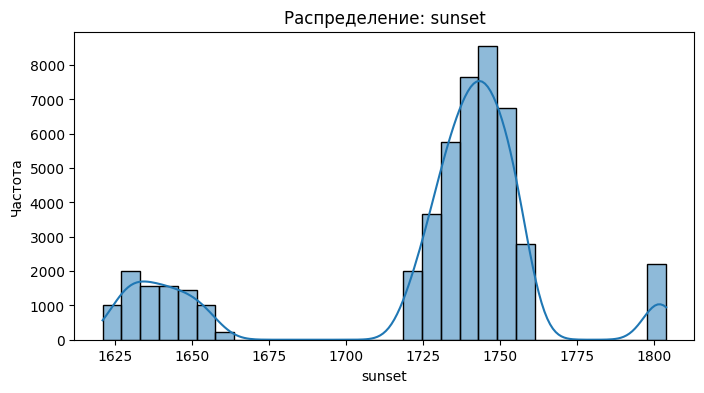

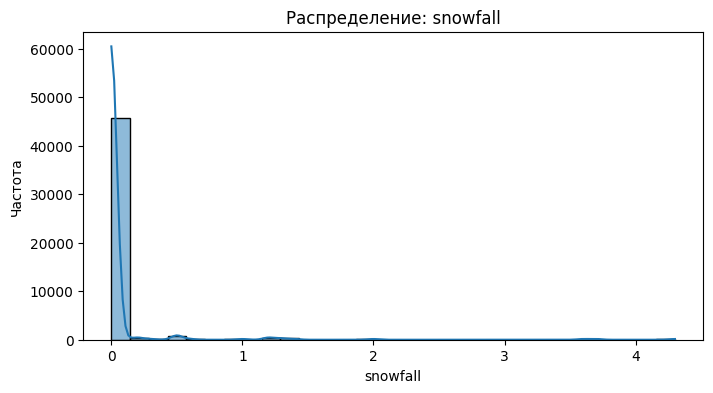

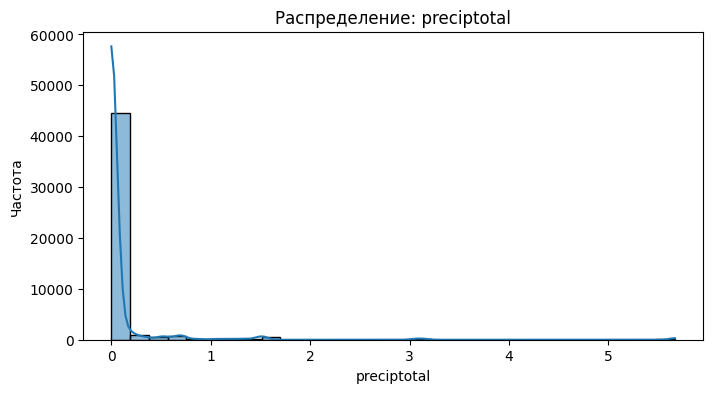

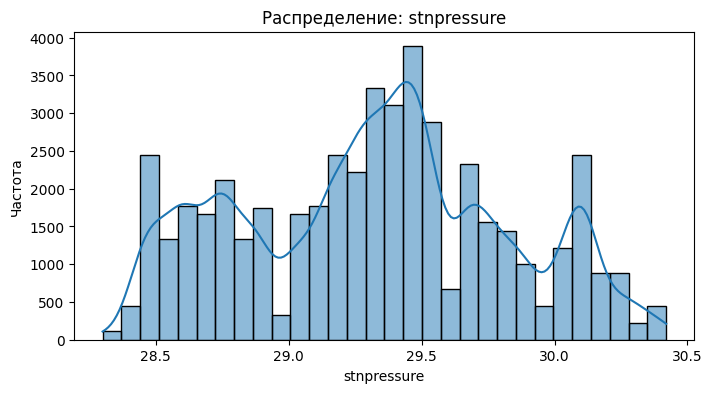

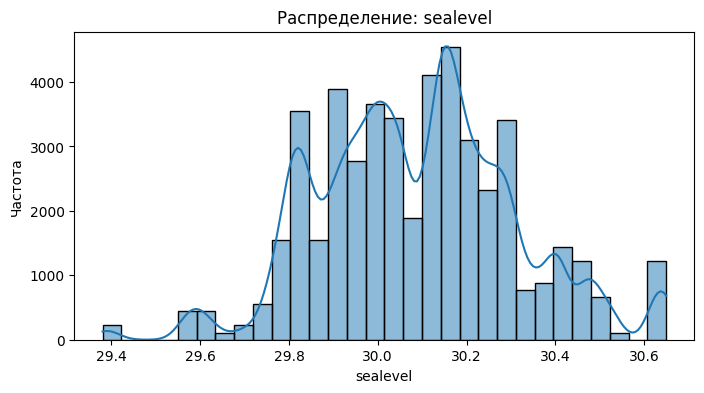

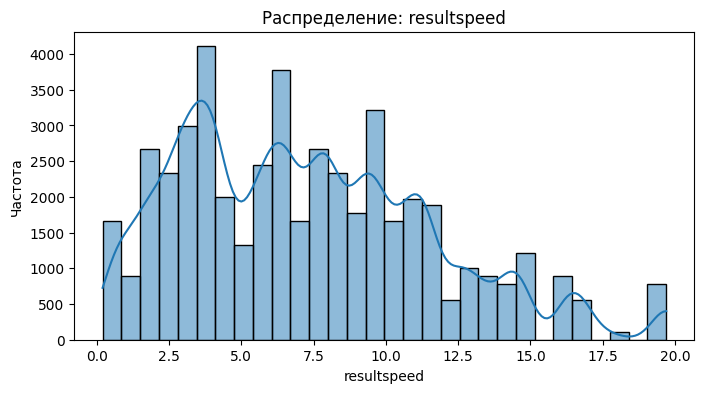

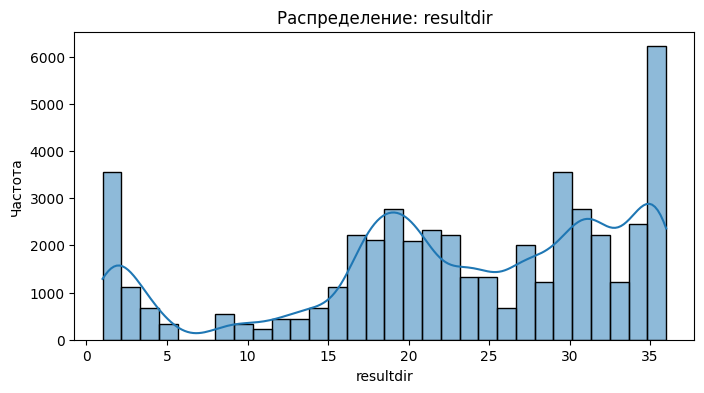

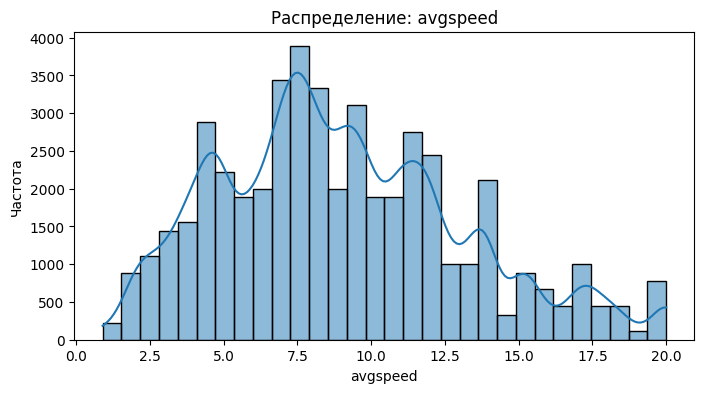

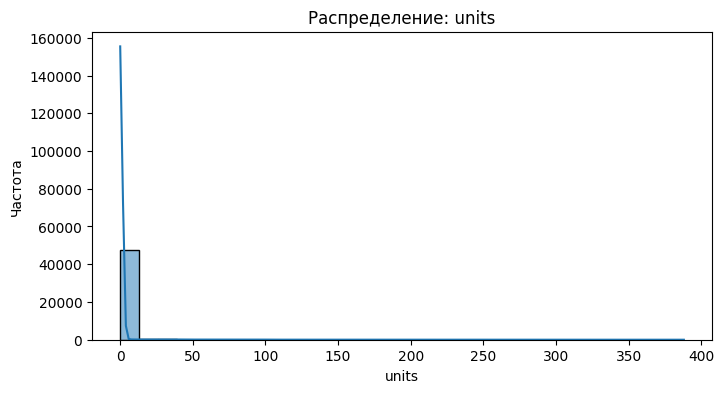

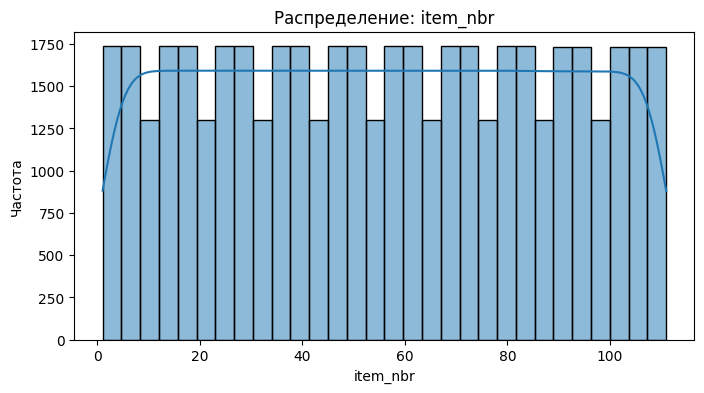

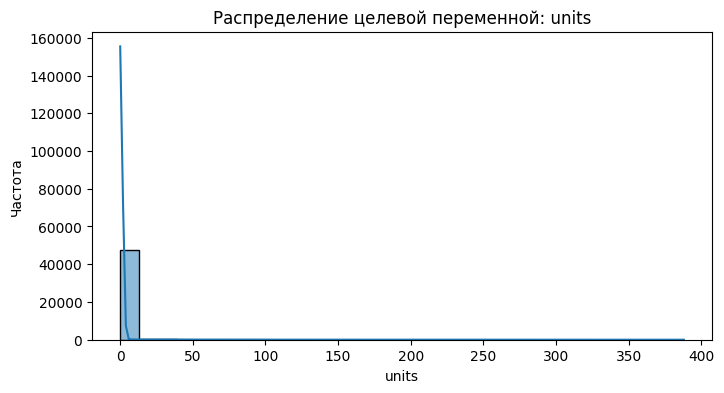


=== Анализ выбросов ===


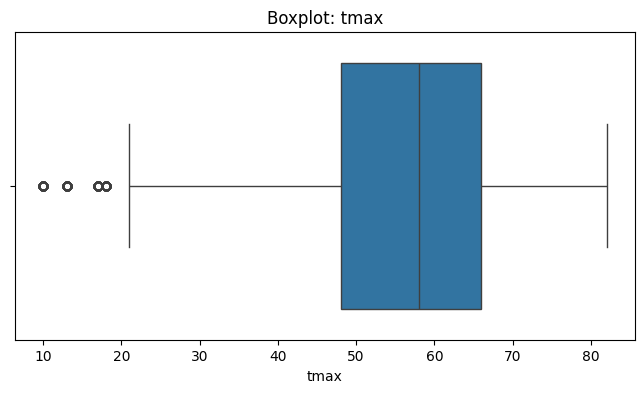

Кол-во выбросов в tmax: 444


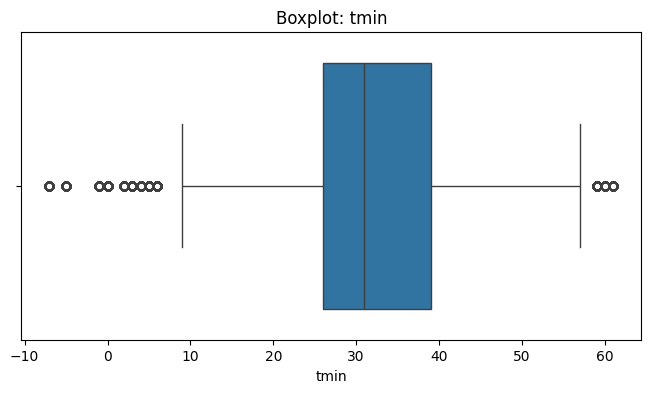

Кол-во выбросов в tmin: 2109


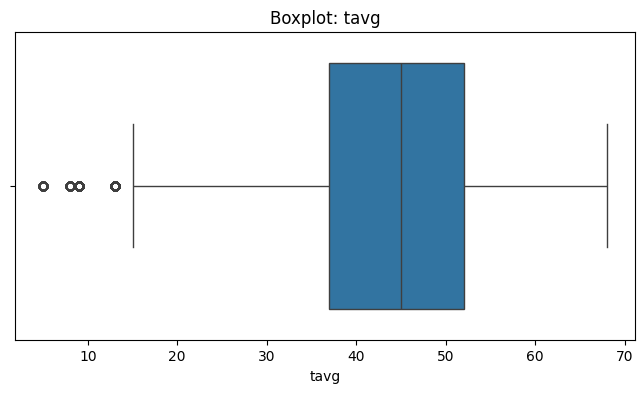

Кол-во выбросов в tavg: 888


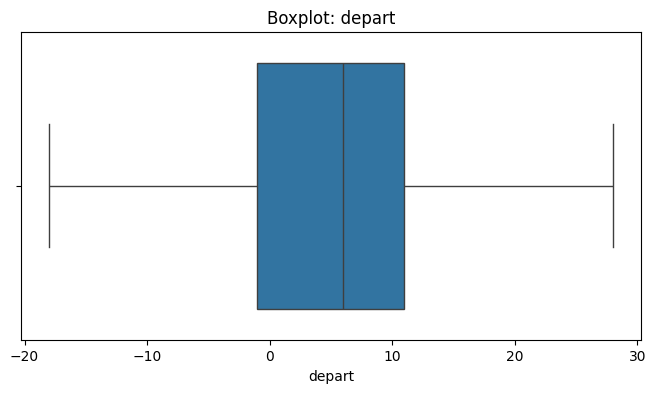

Кол-во выбросов в depart: 0


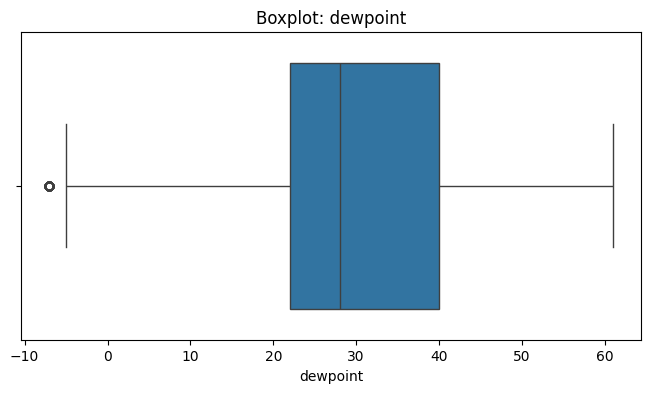

Кол-во выбросов в dewpoint: 111


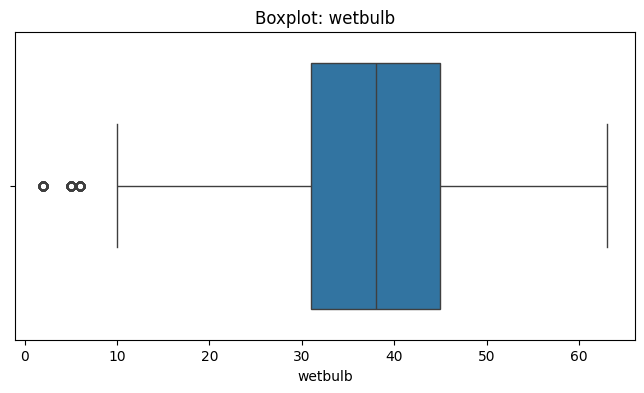

Кол-во выбросов в wetbulb: 333


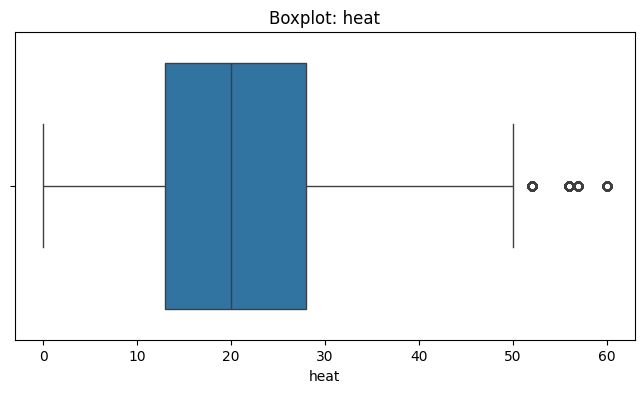

Кол-во выбросов в heat: 888


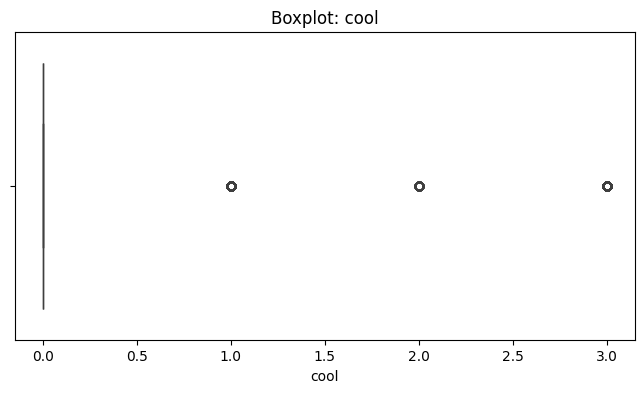

Кол-во выбросов в cool: 1221


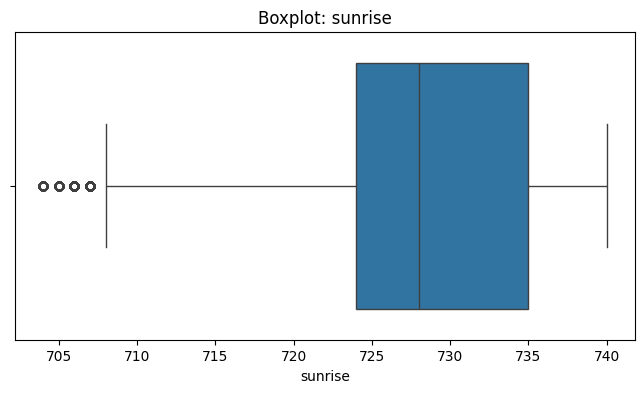

Кол-во выбросов в sunrise: 888


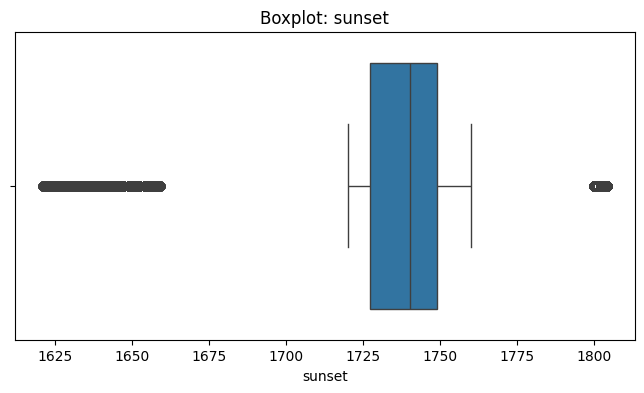

Кол-во выбросов в sunset: 10989


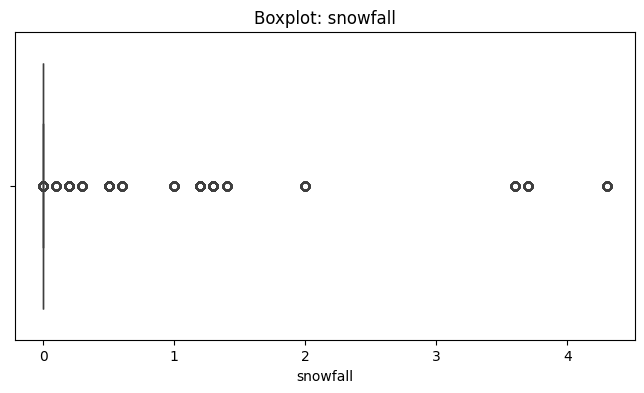

Кол-во выбросов в snowfall: 4551


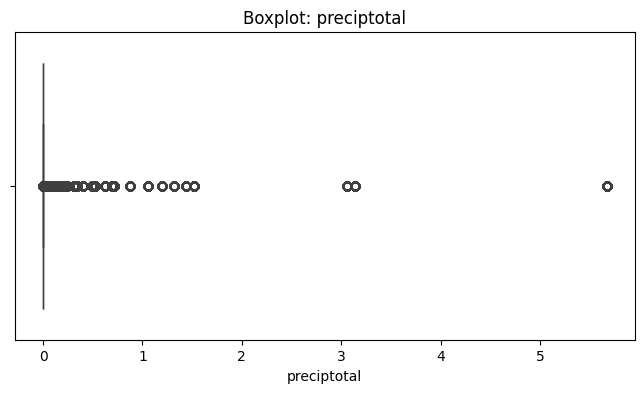

Кол-во выбросов в preciptotal: 11988


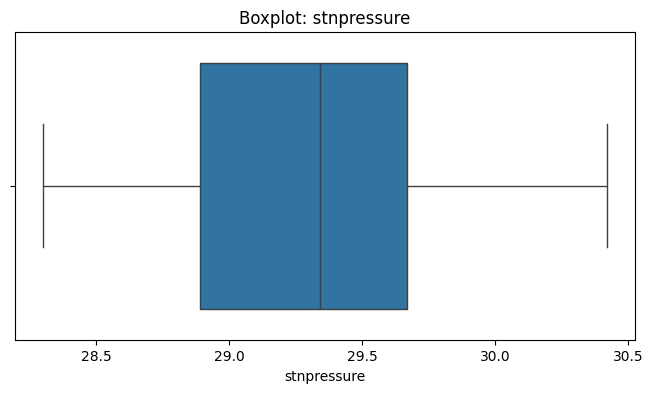

Кол-во выбросов в stnpressure: 0


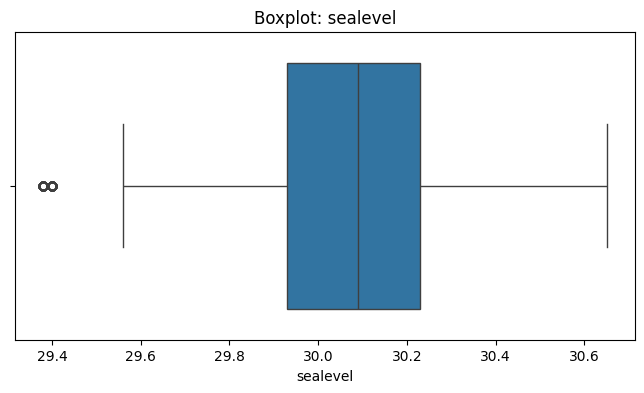

Кол-во выбросов в sealevel: 222


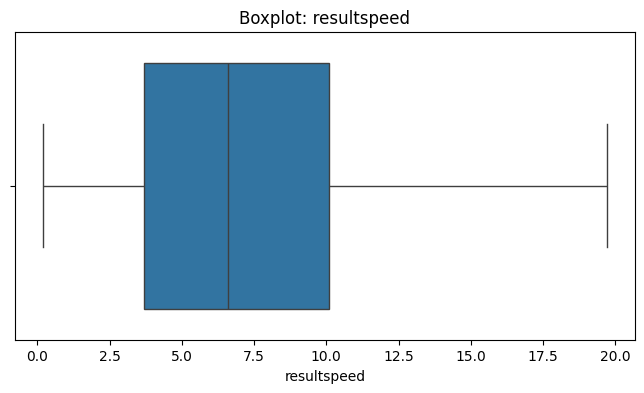

Кол-во выбросов в resultspeed: 0


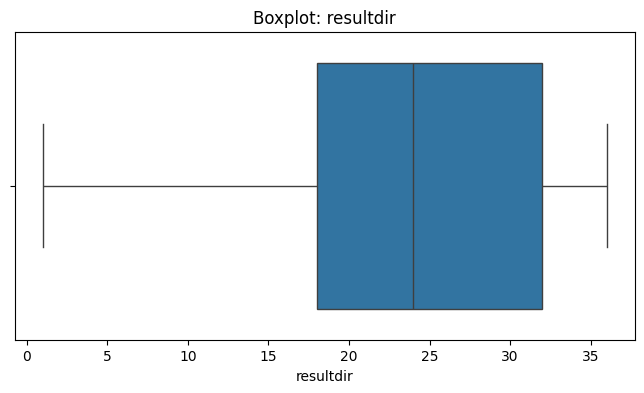

Кол-во выбросов в resultdir: 0


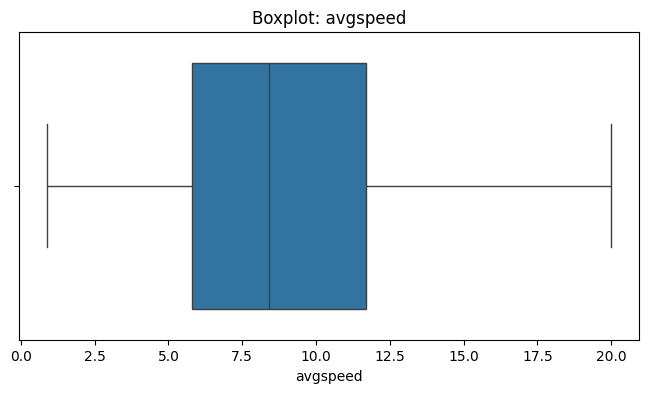

Кол-во выбросов в avgspeed: 0


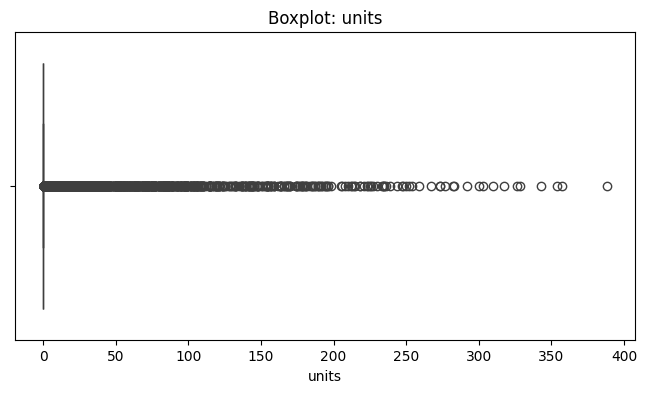

Кол-во выбросов в units: 1199


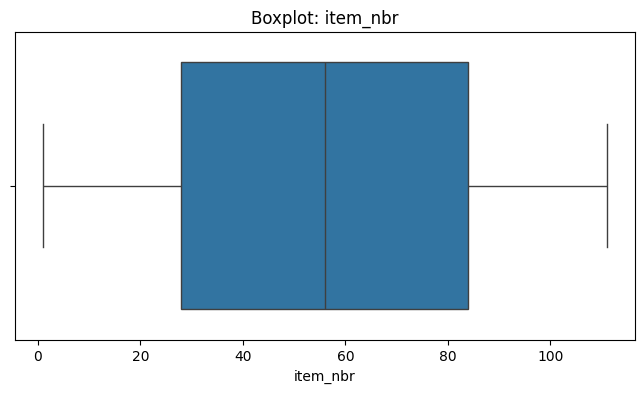

Кол-во выбросов в item_nbr: 0

=== Анализ сбалансированности целевой переменной ===


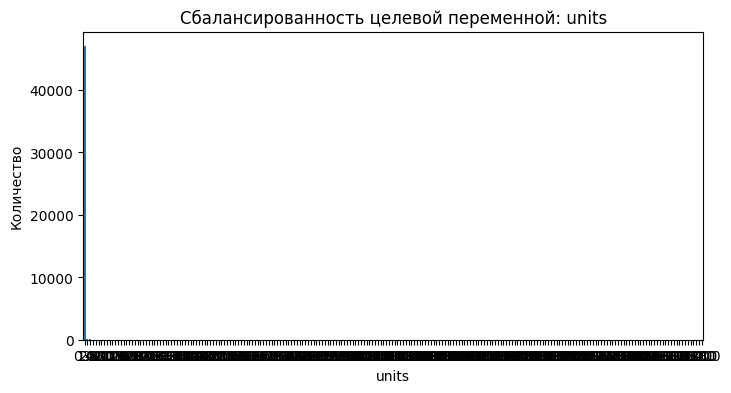


Баланс классов (%):
units
0.0      97.509710
1.0       0.280391
2.0       0.157850
3.0       0.066463
4.0       0.056078
           ...    
181.0     0.002077
162.0     0.002077
212.0     0.002077
193.0     0.002077
223.0     0.002077
Name: proportion, Length: 222, dtype: float64


In [11]:
#Запуск Анализа

target_column = 'units'

print("\n=== Распределения признаков и целевой переменной ===")
plot_distributions(df, target_col=target_column)

print("\n=== Анализ выбросов ===")
analyze_outliers(df)

print("\n=== Анализ сбалансированности целевой переменной ===")
analyze_target_balance(df, target_col=target_column)#

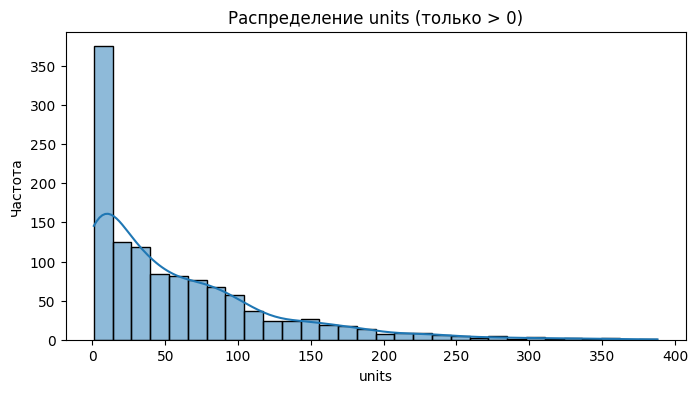

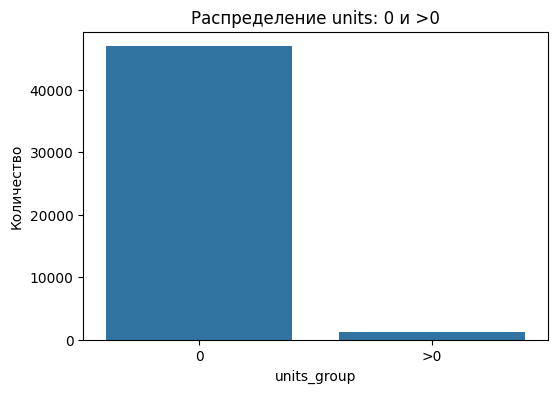


=== Статистика по целевой переменной ===
units_group
0     46948
>0     1199
Name: count, dtype: int64

Проценты (%):
units_group
0     97.51
>0     2.49
Name: count, dtype: float64


In [12]:
# Анализ целевой переменной 'units' с разбиением на 0 и >0

def analyze_target_units(df, target_col='units'):
    # 1. Распределение значений > 0
    df_positive = df[df[target_col] > 0]

    plt.figure(figsize=(8, 4))
    sns.histplot(df_positive[target_col], kde=True, bins=30)
    plt.title(f'Распределение {target_col} (только > 0)')
    plt.xlabel(target_col)
    plt.ylabel('Частота')
    plt.show()

    # 2. Распределение: 0 и >0
    df['units_group'] = df[target_col].apply(lambda x: '0' if x == 0 else '>0')

    plt.figure(figsize=(6, 4))
    sns.countplot(x='units_group', data=df)
    plt.title(f'Распределение {target_col}: 0 и >0')
    plt.ylabel('Количество')
    plt.show()

    # 3. Вывод статистики
    counts = df['units_group'].value_counts()
    print("\n=== Статистика по целевой переменной ===")
    print(counts)
    print("\nПроценты (%):")
    print(round(counts / counts.sum() * 100, 2))

# Запуск функции
analyze_target_units(df, target_col='units')

In [13]:
#  Анализ категориальных признаков
if 'units_group' in df.columns:
    df = df.drop(columns='units_group')

def analyze_categorical_features(df):
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    for col in cat_cols:
        print(f"\n🔸 Признак: {col}")
        print(f"Уникальных значений: {df[col].nunique()}, {df[col].unique()}")

analyze_categorical_features(df)



🔸 Признак: city
Уникальных значений: 9, ['Los Angeles' 'Chicago' 'Dallas' 'Indianapolis' 'San Francisco'
 'Philadelphia' 'Seattle' 'Fort Worth' 'San Jose']

🔸 Признак: +FC
Уникальных значений: 1, [False]

🔸 Признак: FC
Уникальных значений: 1, [False]

🔸 Признак: TS
Уникальных значений: 2, [False True]

🔸 Признак: GR
Уникальных значений: 1, [False]

🔸 Признак: RA
Уникальных значений: 2, [True False]

🔸 Признак: DZ
Уникальных значений: 2, [False True]

🔸 Признак: SN
Уникальных значений: 2, [False True]

🔸 Признак: SG
Уникальных значений: 1, [False]

🔸 Признак: GS
Уникальных значений: 1, [False]

🔸 Признак: PL
Уникальных значений: 1, [False]

🔸 Признак: IC
Уникальных значений: 1, [False]

🔸 Признак: FG+
Уникальных значений: 2, [False True]

🔸 Признак: FG
Уникальных значений: 2, [False True]

🔸 Признак: BR
Уникальных значений: 2, [False True]

🔸 Признак: UP
Уникальных значений: 2, [False True]

🔸 Признак: HZ
Уникальных значений: 2, [False True]

🔸 Признак: FU
Уникальных значений: 1, [Fals

In [14]:
def plot_categorical_distributions(df):
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    for col in cat_cols:
        plt.figure(figsize=(8,4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Распределение категорий в признаке: {col}')
        plt.xlabel('Категории')
        plt.ylabel('Количество')
        plt.xticks(rotation=45)
        plt.show()


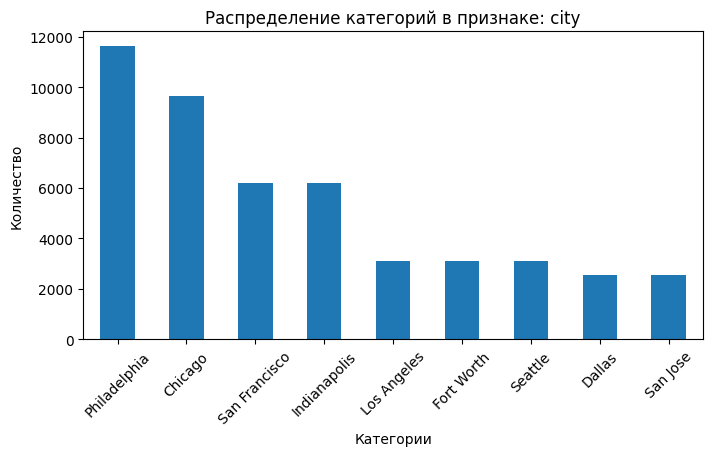

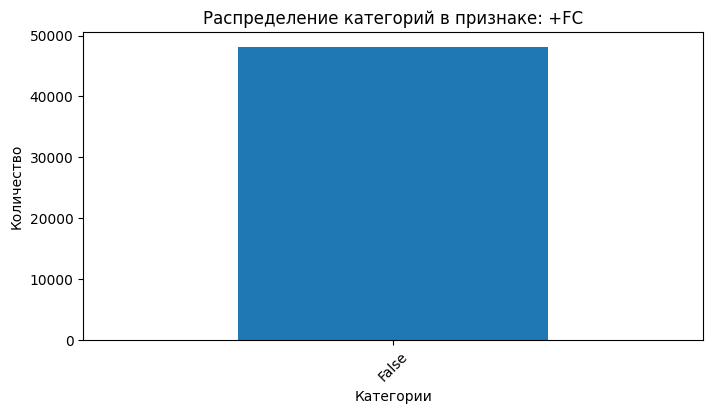

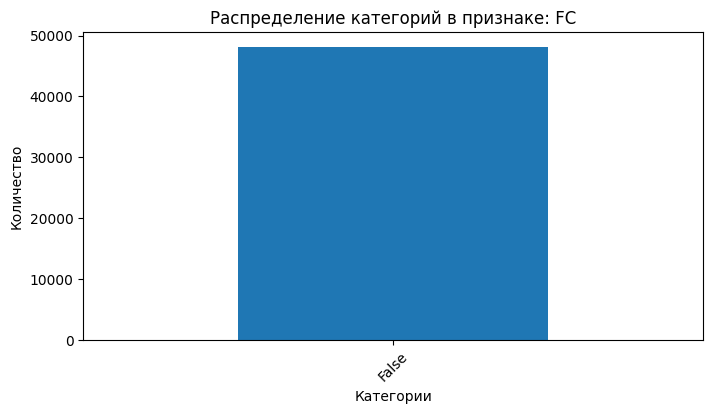

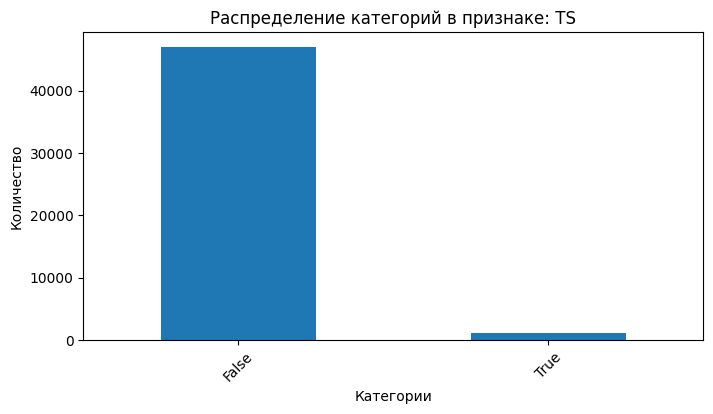

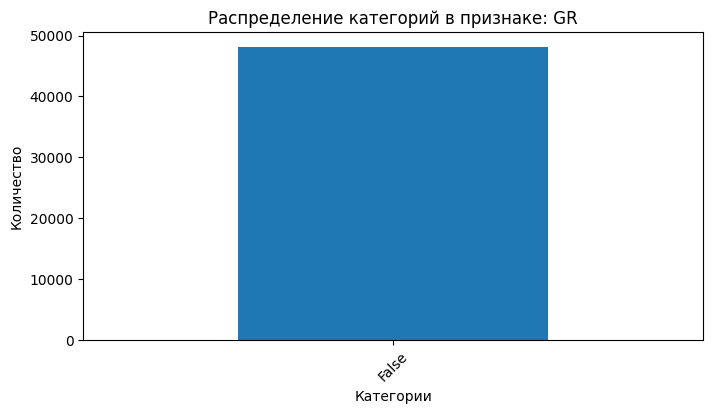

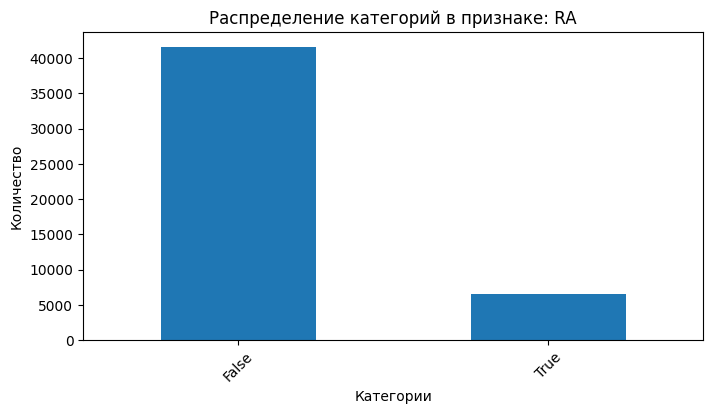

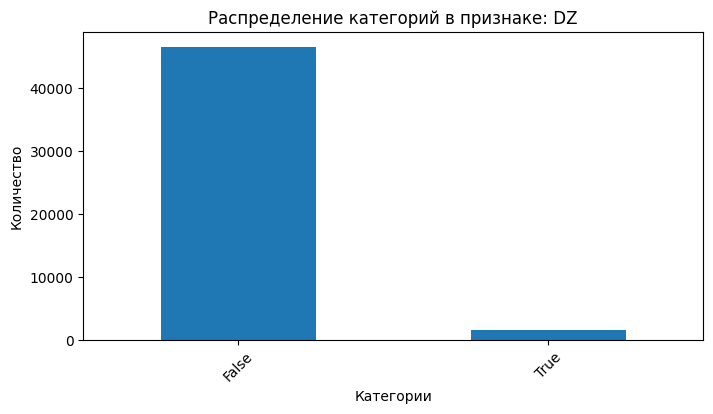

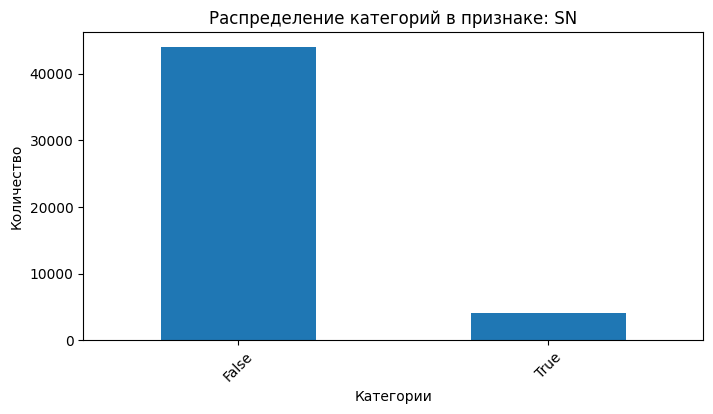

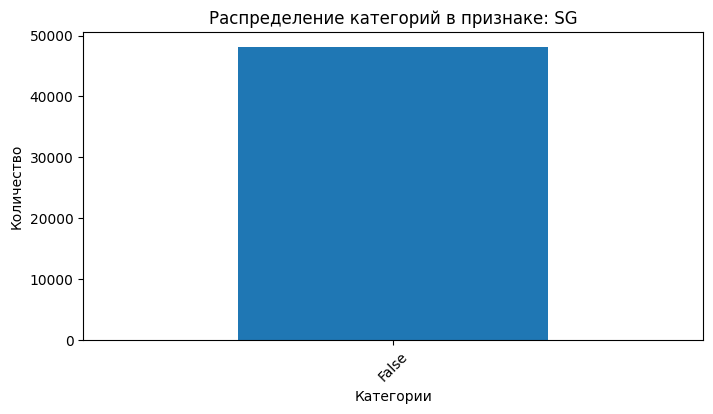

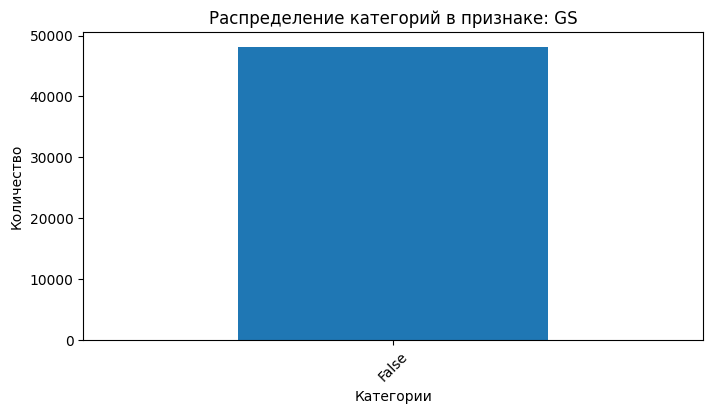

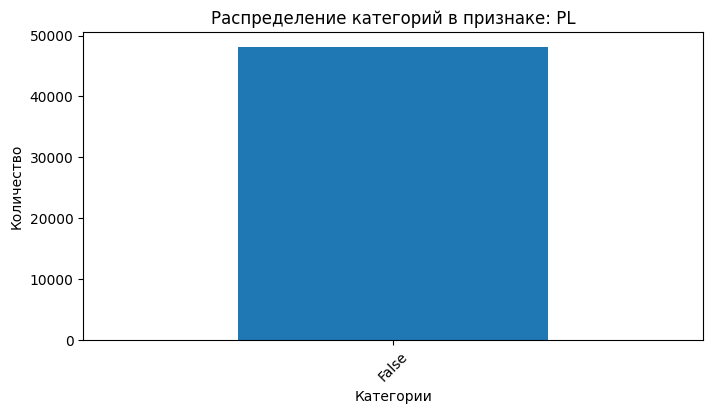

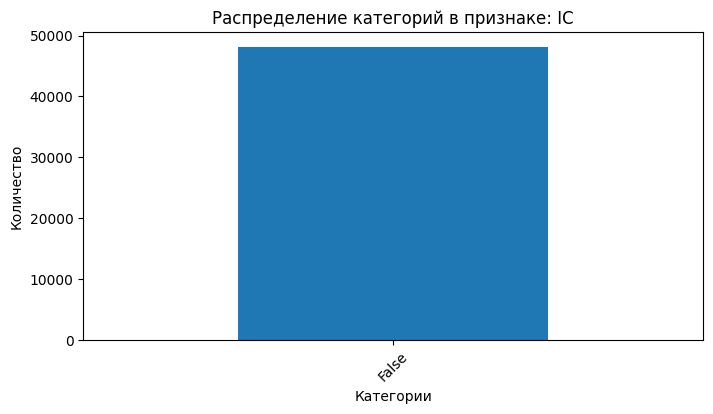

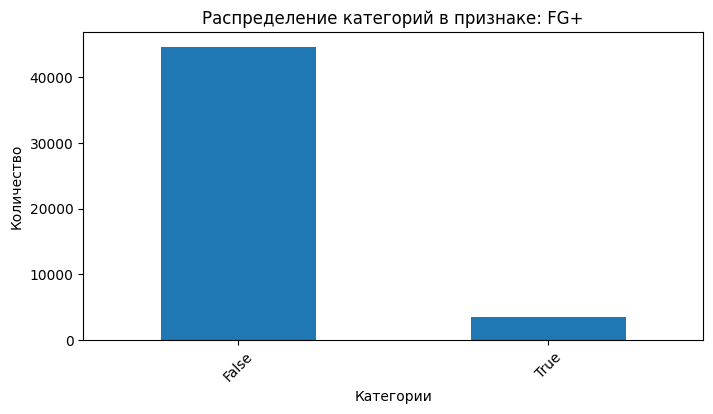

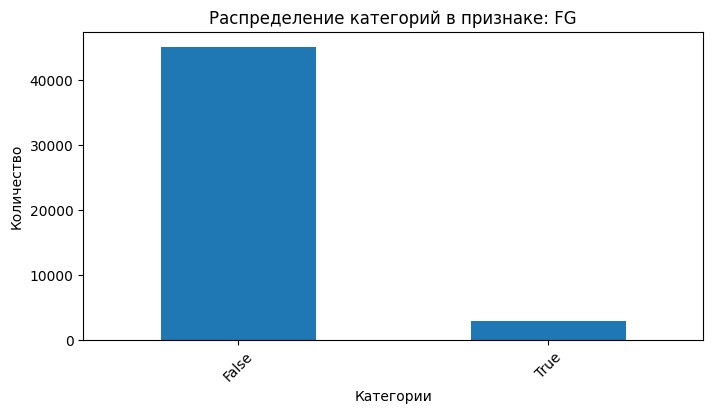

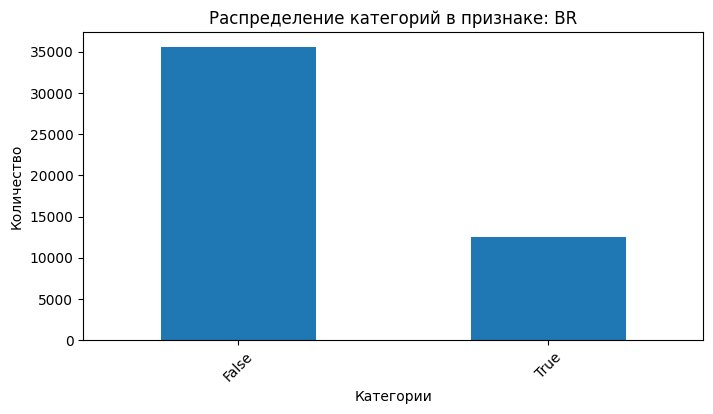

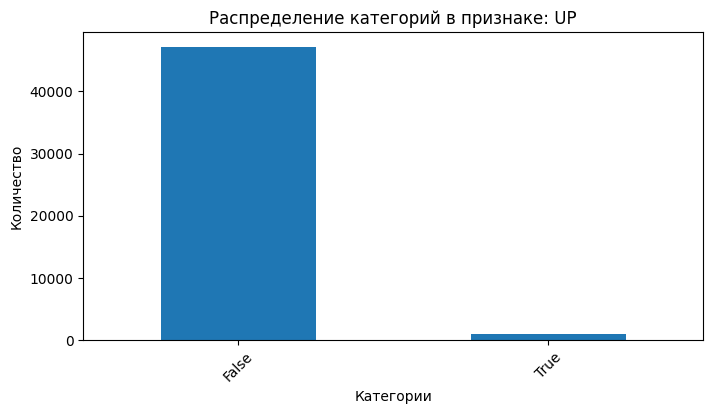

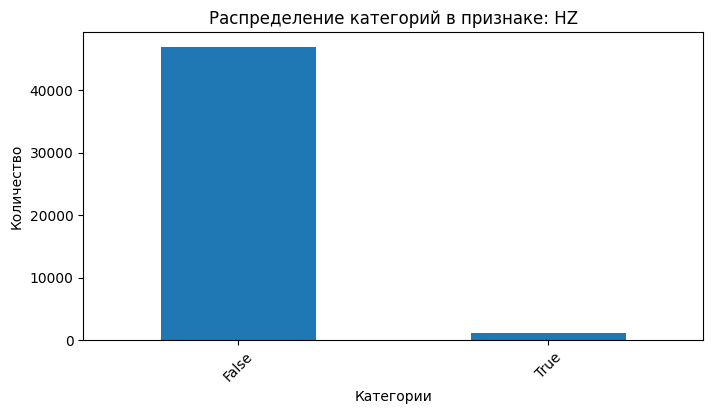

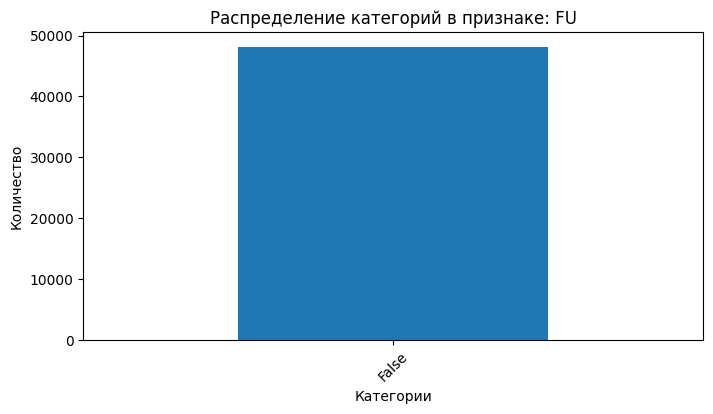

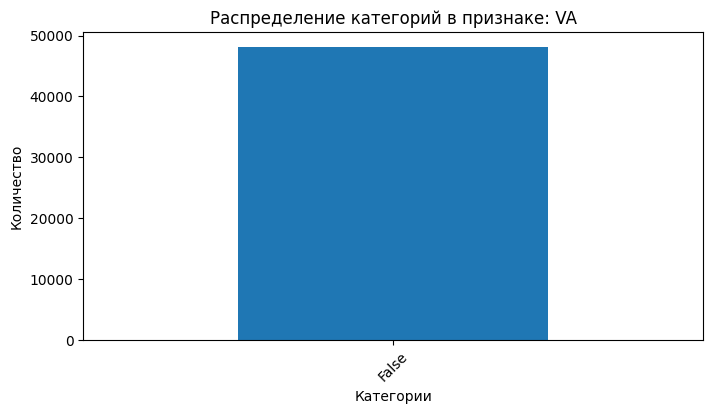

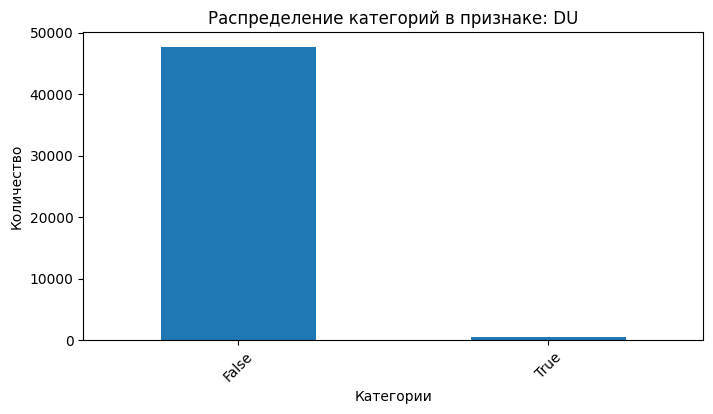

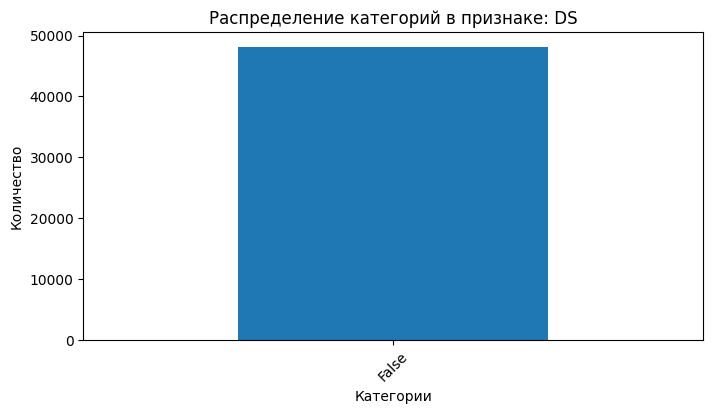

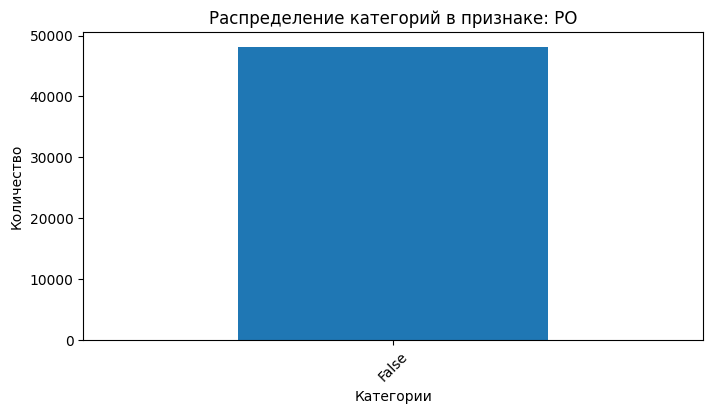

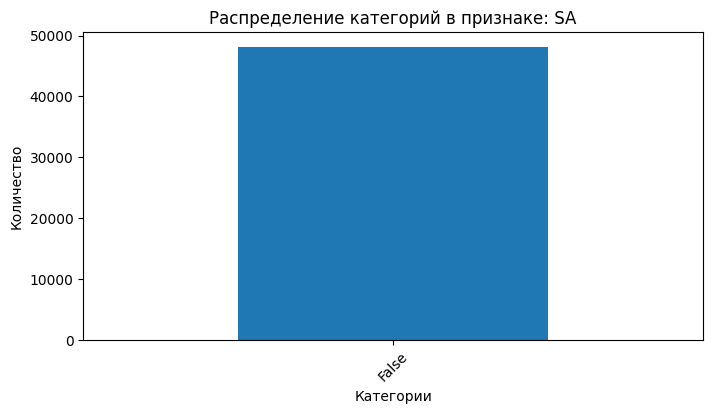

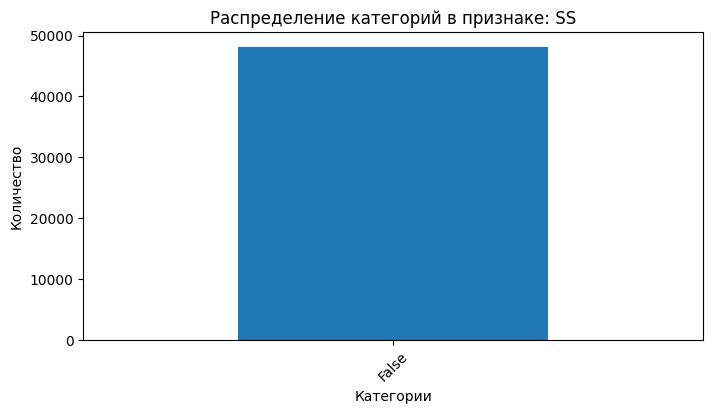

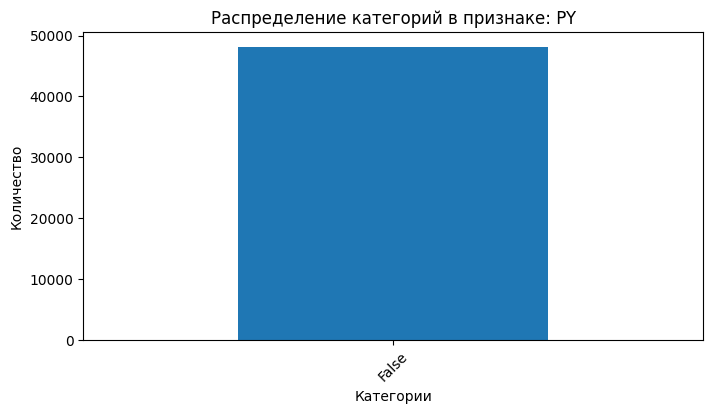

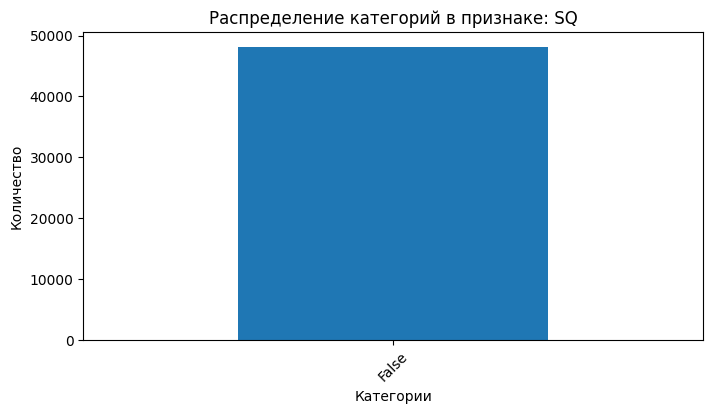

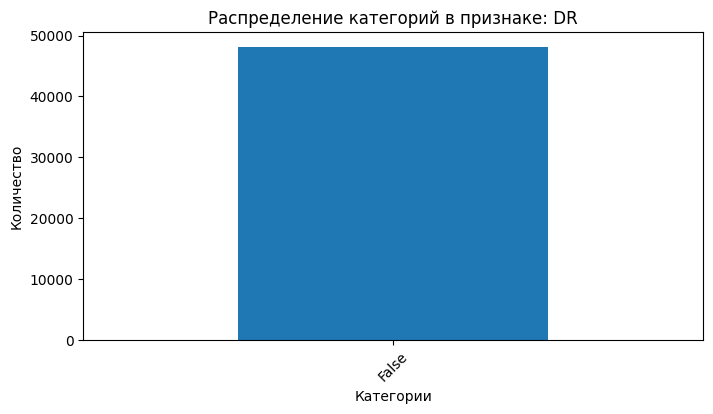

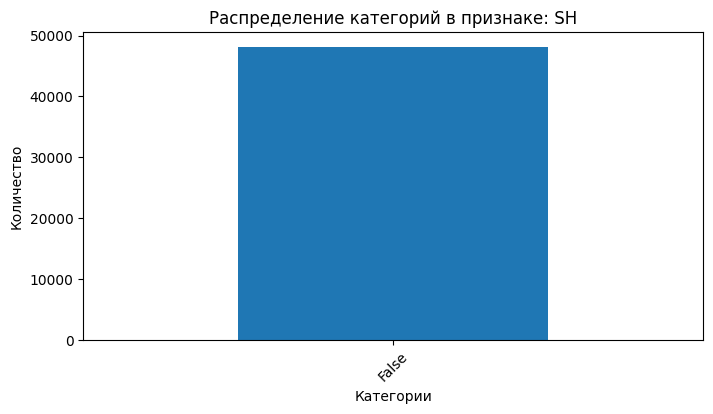

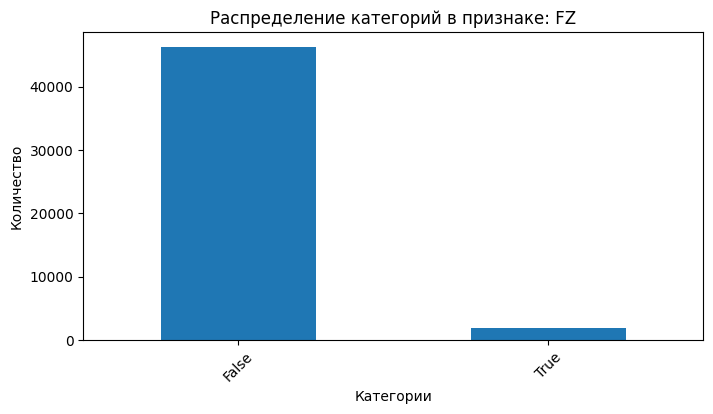

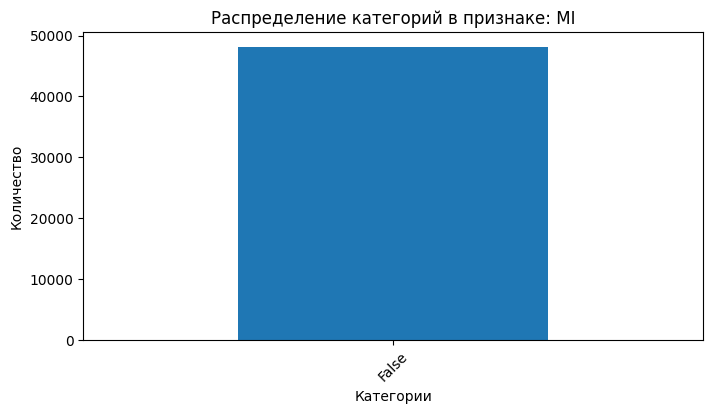

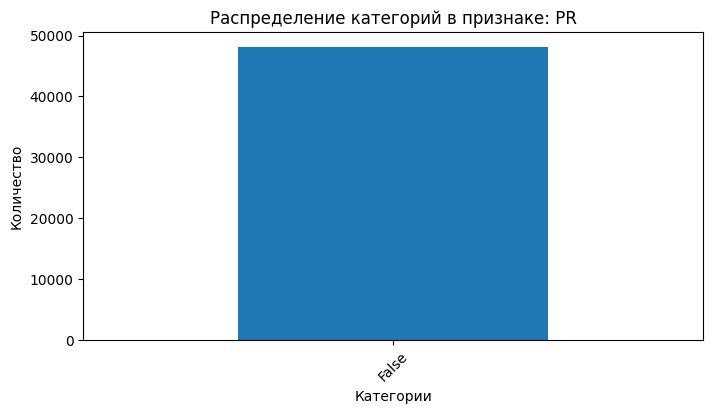

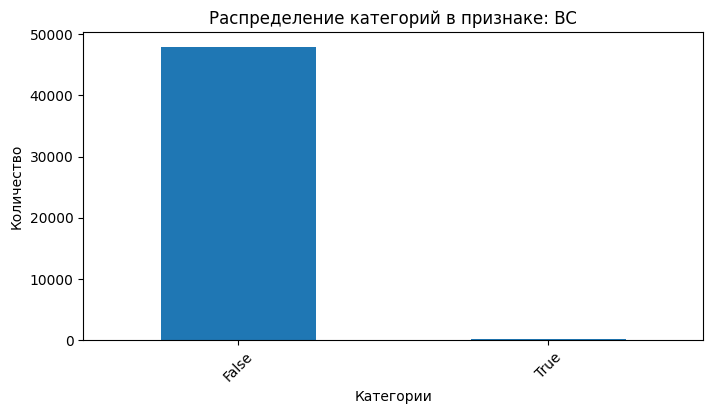

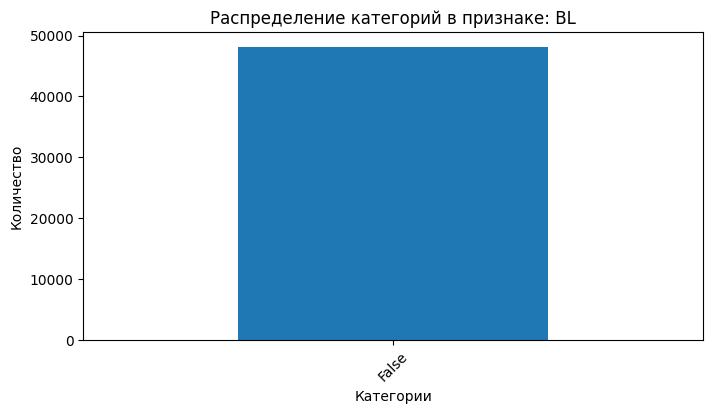

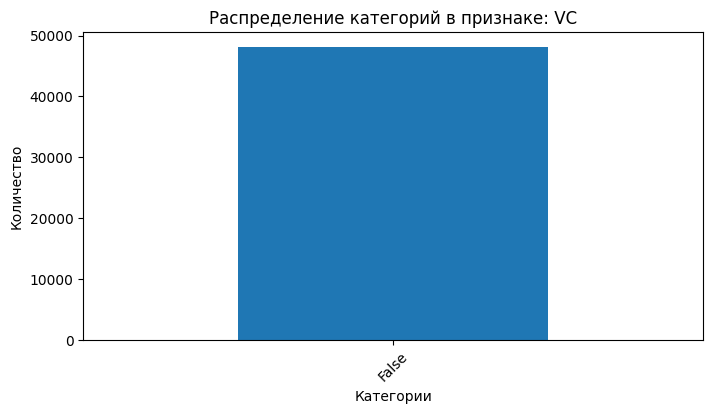

In [15]:
plot_categorical_distributions(df)

На графике представленны коды только с False, по этому они не информативны для обучения

In [16]:
target = 'units'

# Удаляем ненужные признаки
drop_cols = ['units_group', 'temp', 'city']
for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=col)

if target in df.columns:
    X = df.drop(columns=target)
    y = df[target]

    # Кодирование категориальных признаков
    for col in X.select_dtypes(include=['object', 'category']).columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    # Обработка пропусков
    for col in X.columns:
        X[col] = X[col].fillna(X[col].mode()[0]) if X[col].dtype == 'object' or X[col].dtype.name == 'category' else X[col].fillna(X[col].median())

    # Обработка NaN в целевой переменной
    if y.isnull().sum() > 0:
        y = y.fillna(y.median())

    # Выбор модели
    if y.dtypes == 'object' or y.dtypes.name == 'category':
        y = LabelEncoder().fit_transform(y)
        model = RandomForestClassifier(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)

    # Обучение модели
    model.fit(X, y)
    feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    print("\n=== Важность признаков ===")
    display(feature_importance)
else:
    print("\nЦелевой признак 'units' не найден. Пропускаем анализ важности признаков.")


=== Важность признаков ===


,0
item_nbr,0.364704
sunrise,0.196164
stnpressure,0.104249
sunset,0.078499
sealevel,0.031526
depart,0.027661
avgspeed,0.024870
dewpoint,0.024768
resultspeed,0.024741
tmax,0.022852


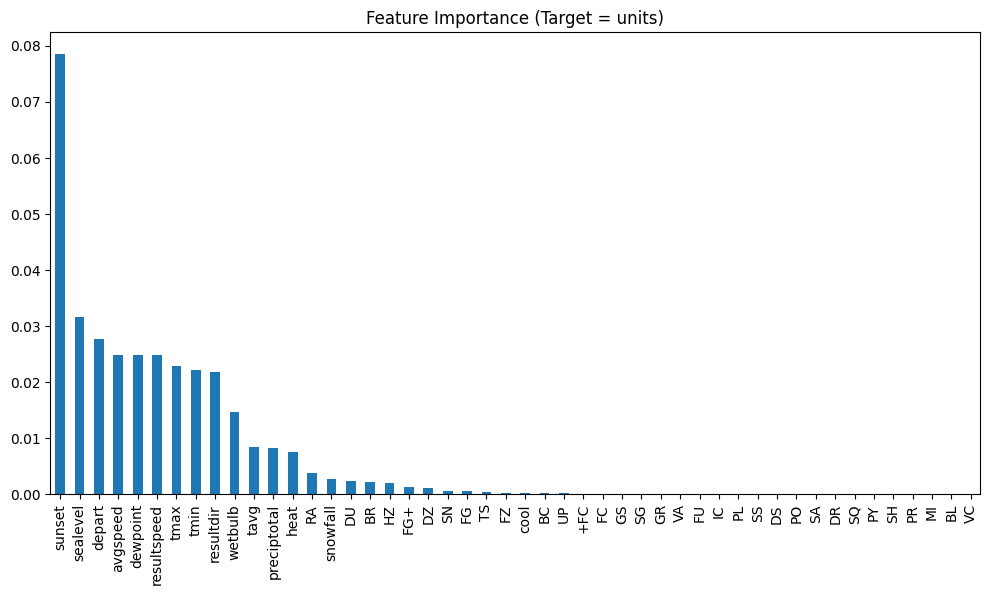

In [21]:
if 'feature_importance' in globals():
    feature_importance_filtered = feature_importance.iloc[3:]
    feature_importance_filtered.plot(kind='bar', figsize=(12,6), title='Feature Importance (Target = units)')
    plt.show()
